# Daily Challenge : Comprehensive Mobile Price Analysis
# 26 JUIN 2025

In [115]:
# IMPORTS GLOBAUX
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.linalg as la
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline

# Project Tasks
# 1. Data Loading 

In [143]:
# 📂 I. Data Loading ...
    # I.1. Data Loading

df = pd.read_csv("train.csv")

In [144]:
    # I.2 ... and Exploration:
        # Utilize Pandas to load the dataset and explore its initial structure.
    print(df.head())
    print(df.tail()) 

        # Summarize features, target variable, and their respective data types.


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [145]:
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Comment : all columns are digital. No format treatment seems required at 1st sight.

In [ ]:
# BASIC IMPORTS :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
%matplotlib inline

In [146]:
# 📂 I. Data Loading and Exploration
    # I.1. Data Loading
df = pd.read_csv("train.csv")

# DataFrame Basics
print(df.head())
print(df.tail()) 
df.shape
df.info()
df.describe()

In [147]:
# DataFrame Basics
print(df.head())
print(df.tail()) 

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [148]:
df.shape

(2000, 21)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [150]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [151]:
    df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Nom de colonne	                        Libellé explicite
battery_power	                            Puissance de la batterie (en mAh)
blue	                                    Présence du Bluetooth (1 = oui, 0 = non)
clock_speed	                                Fréquence d'horloge du processeur (en GHz)
dual_sim	                                Présence d'une double carte SIM (1 = oui, 0 = non)
fc	                                        Résolution de la caméra frontale (en mégapixels)
four_g	                                    Compatibilité 4G (1 = oui, 0 = non)
int_memory	                                Mémoire interne du téléphone (en Go)
m_dep	                                    Profondeur du mobile (épaisseur en cm)
mobile_wt	                                Poids du mobile (en grammes)
n_cores	                                    Nombre de cœurs du processeur
pc	                                        Résolution de la caméra principale (en mégapixels)
px_height	                                Hauteur de l’écran en pixels
px_width	                                Largeur de l’écran en pixels
ram	Mémoire vive                            (RAM) en Mo
sc_h	                                    Hauteur de l’écran (physique, en cm)
sc_w	                                    Largeur de l’écran (physique, en cm)
talk_time	                                Autonomie en communication (en heures)
three_g	                                    Compatibilité 3G (1 = oui, 0 = non)
touch_screen	                            Écran tactile (1 = oui, 0 = non)
wifi	                                    Présence du Wi-Fi (1 = oui, 0 = non)
price_range	                                Gamme de prix (0 = bas, 1 = moyen-bas, 2 = moyen-haut, 3 = haut) — cible


In [152]:
# Keep existing 'px_height' and 'px_width' columns to avoid having them removed in the creation of useful Composite Columns to come 
required_cols = ['px_height', 'px_width']
if all(col in df.columns for col in required_cols):
    df['px_area'] = df['px_height'] * df['px_width']

In [153]:
# Practical Recommendations
# A. Create Useful Composite Columns before removal of original columns
df['px_area'] = df['px_height'] * df['px_width']
df['screen_area'] = df['sc_h'] * df['sc_w']
df['connectivity_score'] = df[['blue', 'wifi', 'three_g', 'four_g']].sum(axis=1)
df['camera_total'] = df['fc'] + df['pc']

# Original columns removal 
df.drop(['px_height', 'px_width', 'sc_h', 'sc_w', 'fc', 'pc'], axis=1, inplace=True)

In [154]:
    df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'px_area',
       'screen_area', 'connectivity_score', 'camera_total'],
      dtype='object')

In [ ]:
# Practical Recommendations
# As to keep the original columns temporarily for comparison or modeling, creation of a lighter version of the DataFrame:
df_reduced = df.drop(['px_height', 'px_width', 'sc_h', 'sc_w', 'fc', 'pc'], axis=1, errors='ignore')


# Summary of Proposed New Columns

Column	                Description

px_area	                Screen area in pixels
screen_area	            Physical screen area
connectivity_score	    Combined connectivity indicator
camera_total	        Total camera resolution (front + primary)

In [155]:
# II. Data Cleaning and Preprocessing:
    # Address missing or null values        --> no Nan.
    # Transform categorical data into numerical format using suitable methods    --> No categorical data

df.dropna()
print(df.dropna())

      battery_power  blue  clock_speed  dual_sim  four_g  int_memory  m_dep  \
0               842     0          2.2         0       0           7    0.6   
1              1021     1          0.5         1       1          53    0.7   
2               563     1          0.5         1       1          41    0.9   
3               615     1          2.5         0       0          10    0.8   
4              1821     1          1.2         0       1          44    0.6   
...             ...   ...          ...       ...     ...         ...    ...   
1995            794     1          0.5         1       1           2    0.8   
1996           1965     1          2.6         1       0          39    0.2   
1997           1911     0          0.9         1       1          36    0.7   
1998           1512     0          0.9         0       1          46    0.1   
1999            510     1          2.0         1       1          45    0.9   

      mobile_wt  n_cores   ram  talk_time  three_g 

# Comment :
# It appears no missing value in the original Dataframe. No column has been removed; and all data have been kept. 


In [156]:
df.fillna(0)

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,ram,talk_time,three_g,touch_screen,wifi,price_range,px_area,screen_area,connectivity_score,camera_total
0,842,0,2.2,0,0,7,0.6,188,2,2549,19,0,0,1,1,15120,63,1,3
1,1021,1,0.5,1,1,53,0.7,136,3,2631,7,1,1,0,2,1799140,51,3,6
2,563,1,0.5,1,1,41,0.9,145,5,2603,9,1,1,0,2,2167308,22,3,8
3,615,1,2.5,0,0,10,0.8,131,6,2769,11,1,0,0,2,2171776,128,2,9
4,1821,1,1.2,0,1,44,0.6,141,2,1411,15,1,1,0,1,1464096,16,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,1,2,0.8,106,6,668,19,1,1,0,0,2309580,52,3,14
1996,1965,1,2.6,1,0,39,0.2,187,4,2032,16,1,1,1,2,1797975,110,3,3
1997,1911,0,0.9,1,1,36,0.7,108,8,3057,5,1,1,0,3,1416576,9,2,4
1998,1512,0,0.9,0,1,46,0.1,145,5,869,19,1,1,1,0,225120,180,3,9


In [157]:
print(df.columns.tolist())

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'px_area', 'screen_area', 'connectivity_score', 'camera_total']


In [ ]:
        # Conduct basic descriptive statistics for an overview of the dataset.

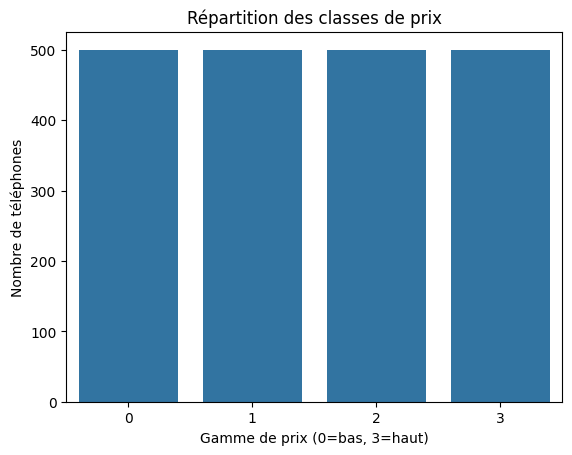

In [101]:
# Visualization
# Step 1. Distribution de la cible price_range

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='price_range', data=df)
plt.title("Répartition des classes de prix")
plt.xlabel("Gamme de prix (0=bas, 3=haut)")
plt.ylabel("Nombre de téléphones")
plt.show()

# Comment : at first sight, very regular split for each pricing range.

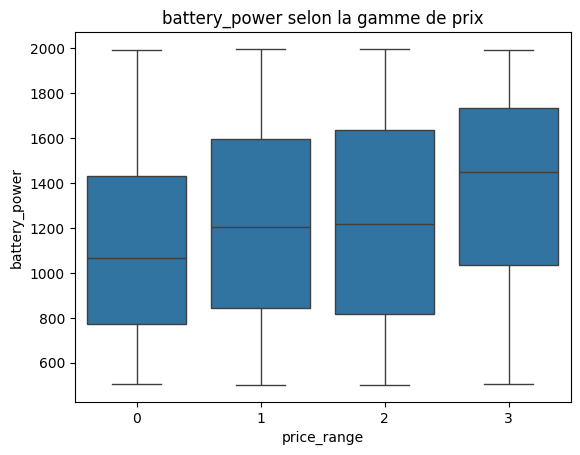

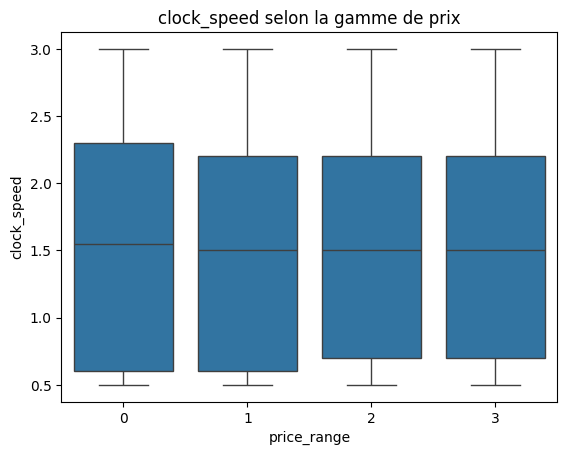

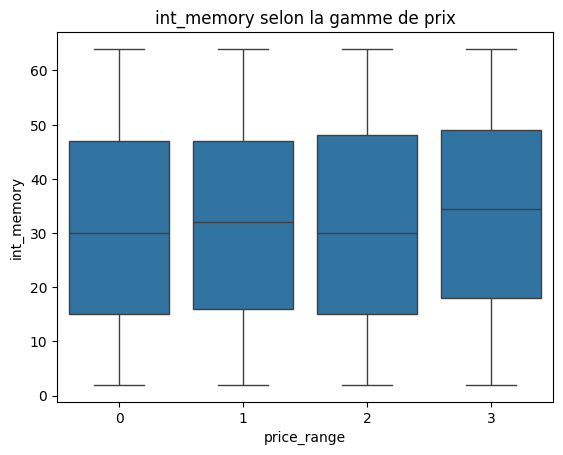

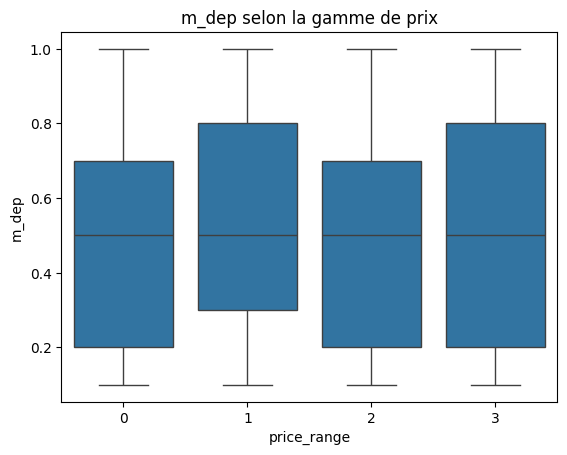

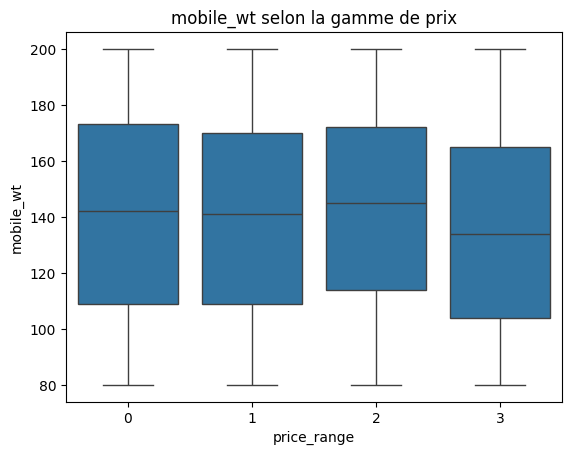

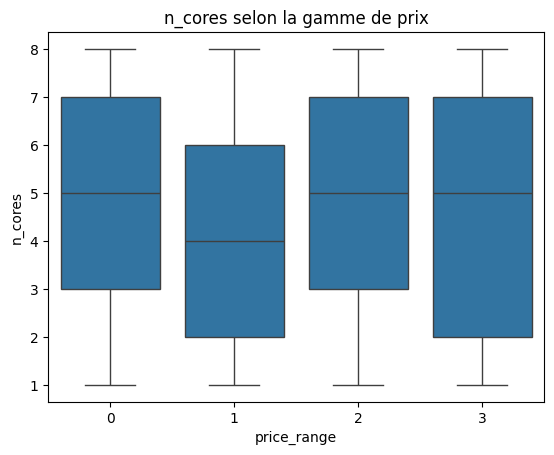

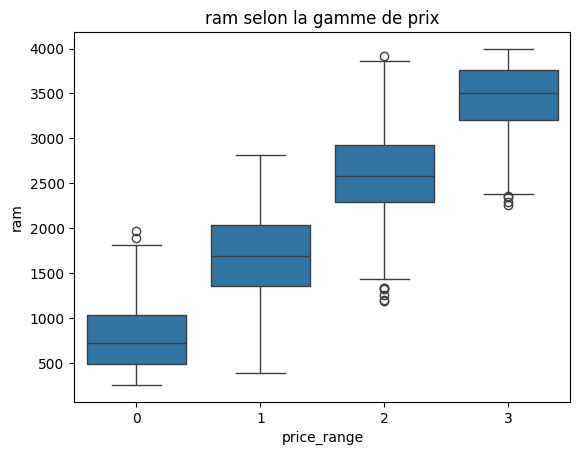

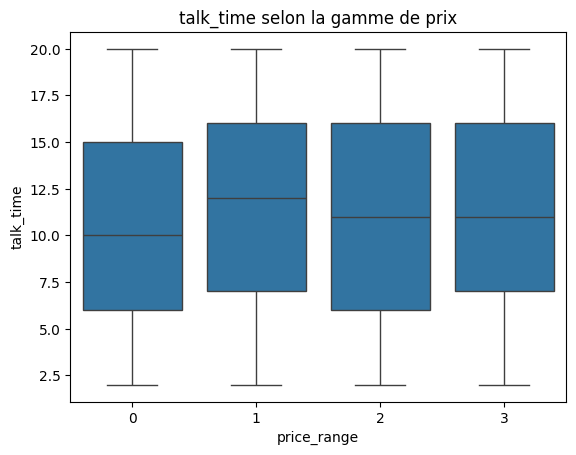

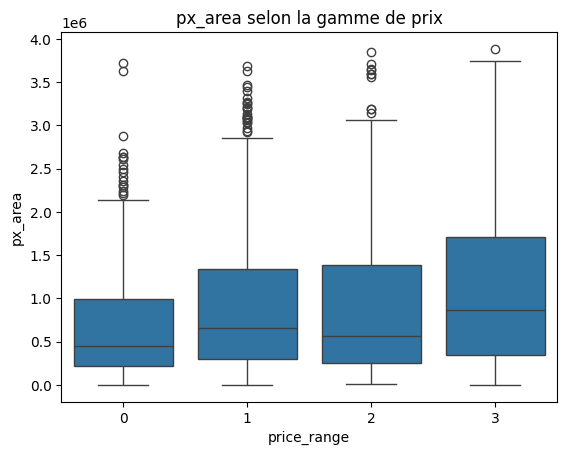

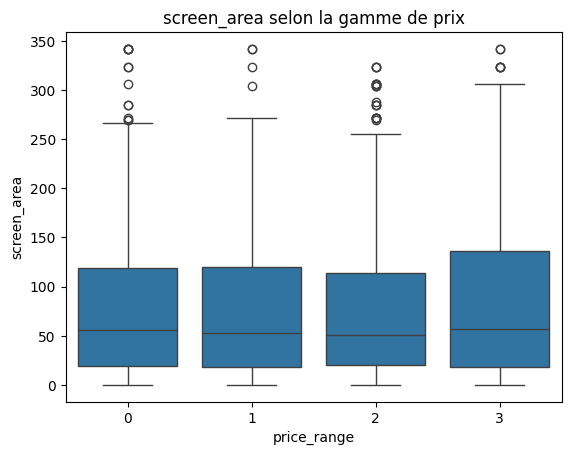

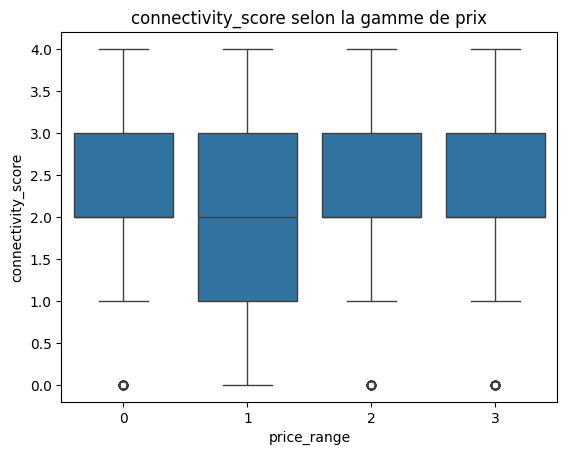

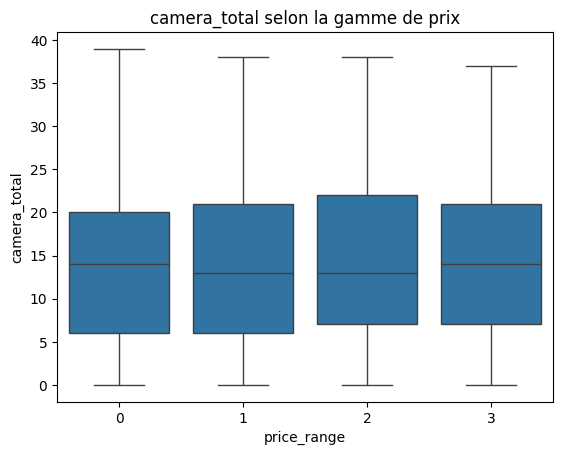

In [158]:
# Step 2. Numerical data vs. price_range
# Boxplots :

num_cols = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 
            'n_cores', 'ram', 'talk_time', 'px_area', 'screen_area', 
            'connectivity_score', 'camera_total']

for col in num_cols:
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f"{col} selon la gamme de prix")
    plt.show()

# Comments : quite surprisingly enough, not all specs seem higly correlated to pricing range. The most correlated specs are RAM (from far) and to a certain extent px area (pixel). 

# Nom de colonne	                        Libellé explicite
battery_power	                            Puissance de la batterie (en mAh)
blue	                                    Présence du Bluetooth (1 = oui, 0 = non)
clock_speed	                                Fréquence d'horloge du processeur (en GHz)
dual_sim	                                Présence d'une double carte SIM (1 = oui, 0 = non)
fc	                                        Résolution de la caméra frontale (en mégapixels)
four_g	                                    Compatibilité 4G (1 = oui, 0 = non)
int_memory	                                Mémoire interne du téléphone (en Go)
m_dep	                                    Profondeur du mobile (épaisseur en cm)
mobile_wt	                                Poids du mobile (en grammes)
n_cores	                                    Nombre de cœurs du processeur
pc	                                        Résolution de la caméra principale (en mégapixels)
px_height	                                Hauteur de l’écran en pixels
px_width	                                Largeur de l’écran en pixels
ram	Mémoire vive                            (RAM) en Mo
sc_h	                                    Hauteur de l’écran (physique, en cm)
sc_w	                                    Largeur de l’écran (physique, en cm)
talk_time	                                Autonomie en communication (en heures)
three_g	                                    Compatibilité 3G (1 = oui, 0 = non)
touch_screen	                            Écran tactile (1 = oui, 0 = non)
wifi	                                    Présence du Wi-Fi (1 = oui, 0 = non)
price_range	                                Gamme de prix (0 = bas, 1 = moyen-bas, 2 = moyen-haut, 3 = haut) — cible


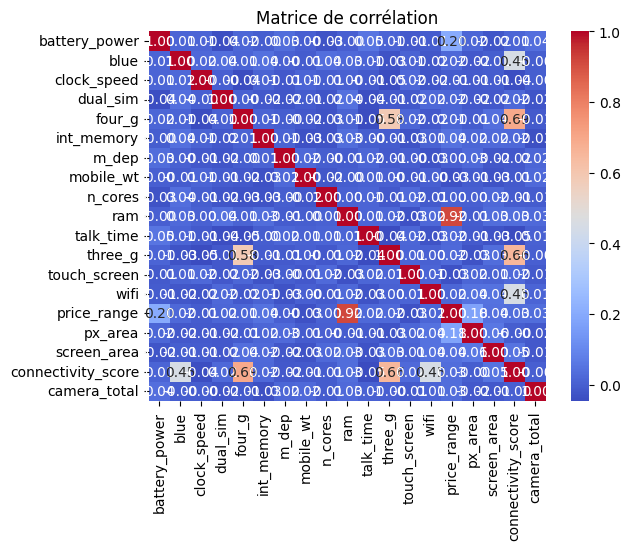

In [ ]:
# Step 3. Global correlations via heatmap :

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Comments : the upper matrix shows very little correlation except for RAM vs price range, as seen above.

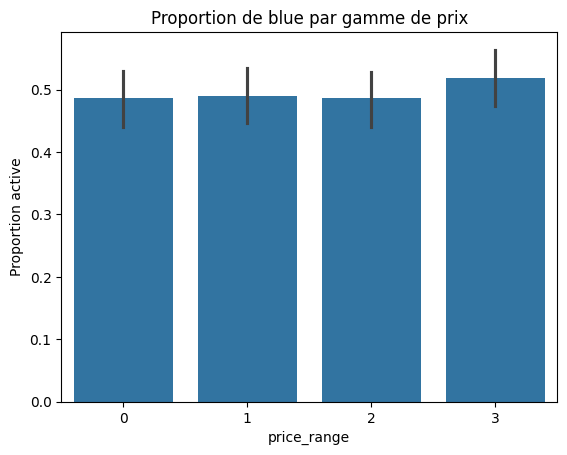

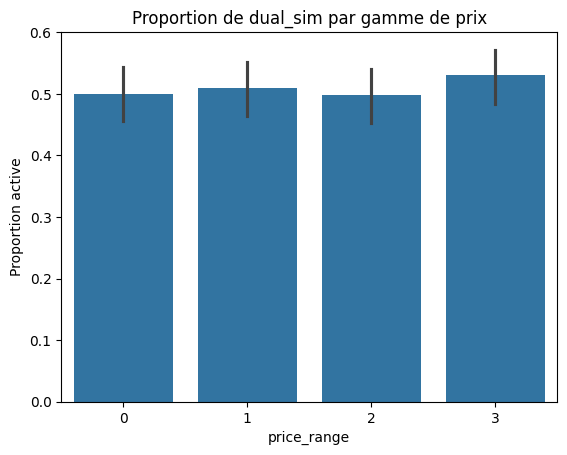

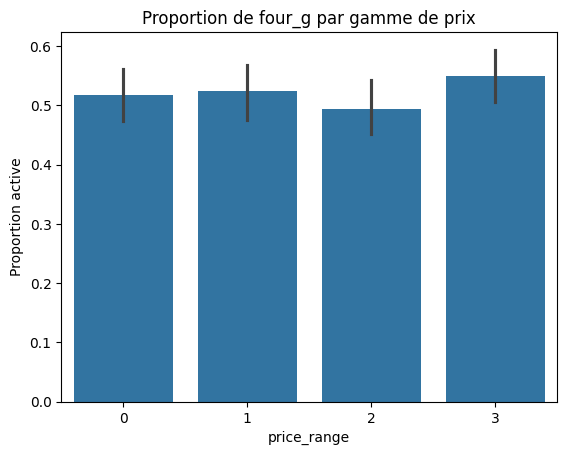

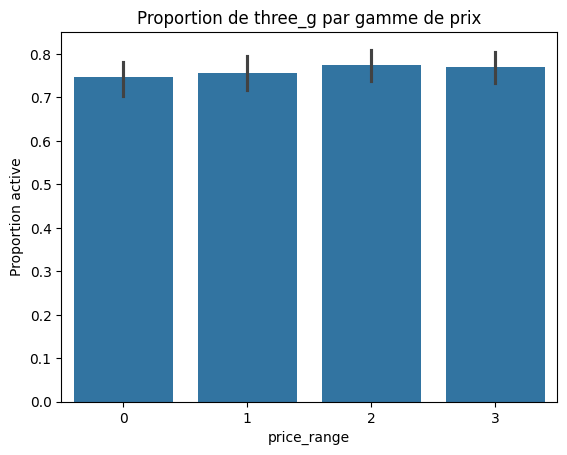

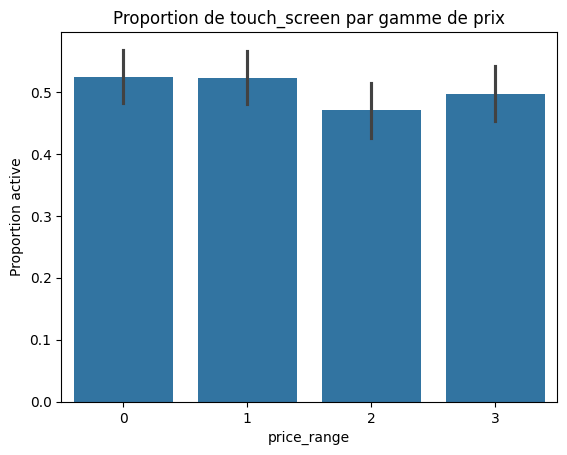

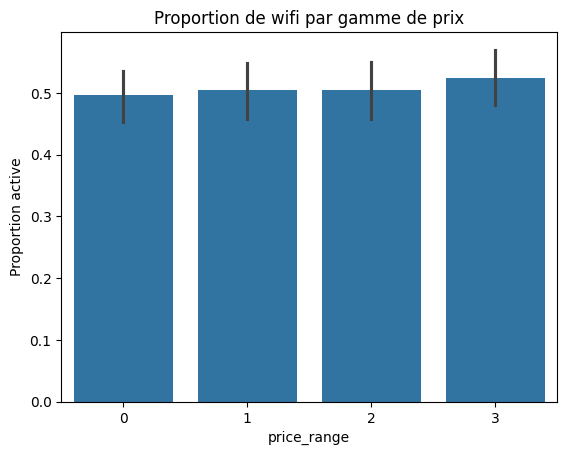

In [159]:
# Step 4. Binary variables vs. price_range (acctivation mean per category) :

bin_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for col in bin_cols:
    sns.barplot(x='price_range', y=col, data=df)
    plt.title(f"Proportion de {col} par gamme de prix")
    plt.ylabel("Proportion active")
    plt.show()

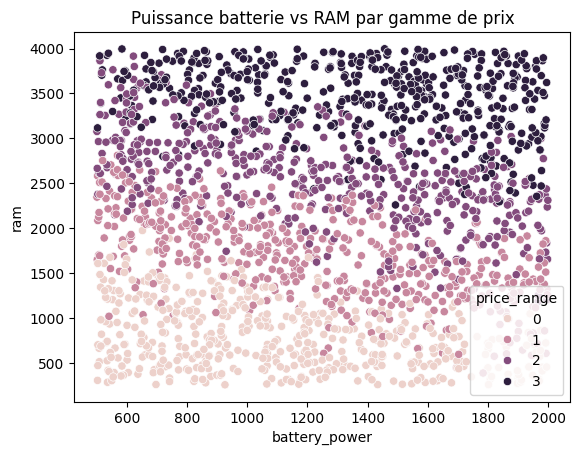

In [ ]:
# Step 5. Relationships between quantitatives variables (Colored scatter plot per price) :

sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)
plt.title("Puissance batterie vs RAM par gamme de prix")
plt.show()

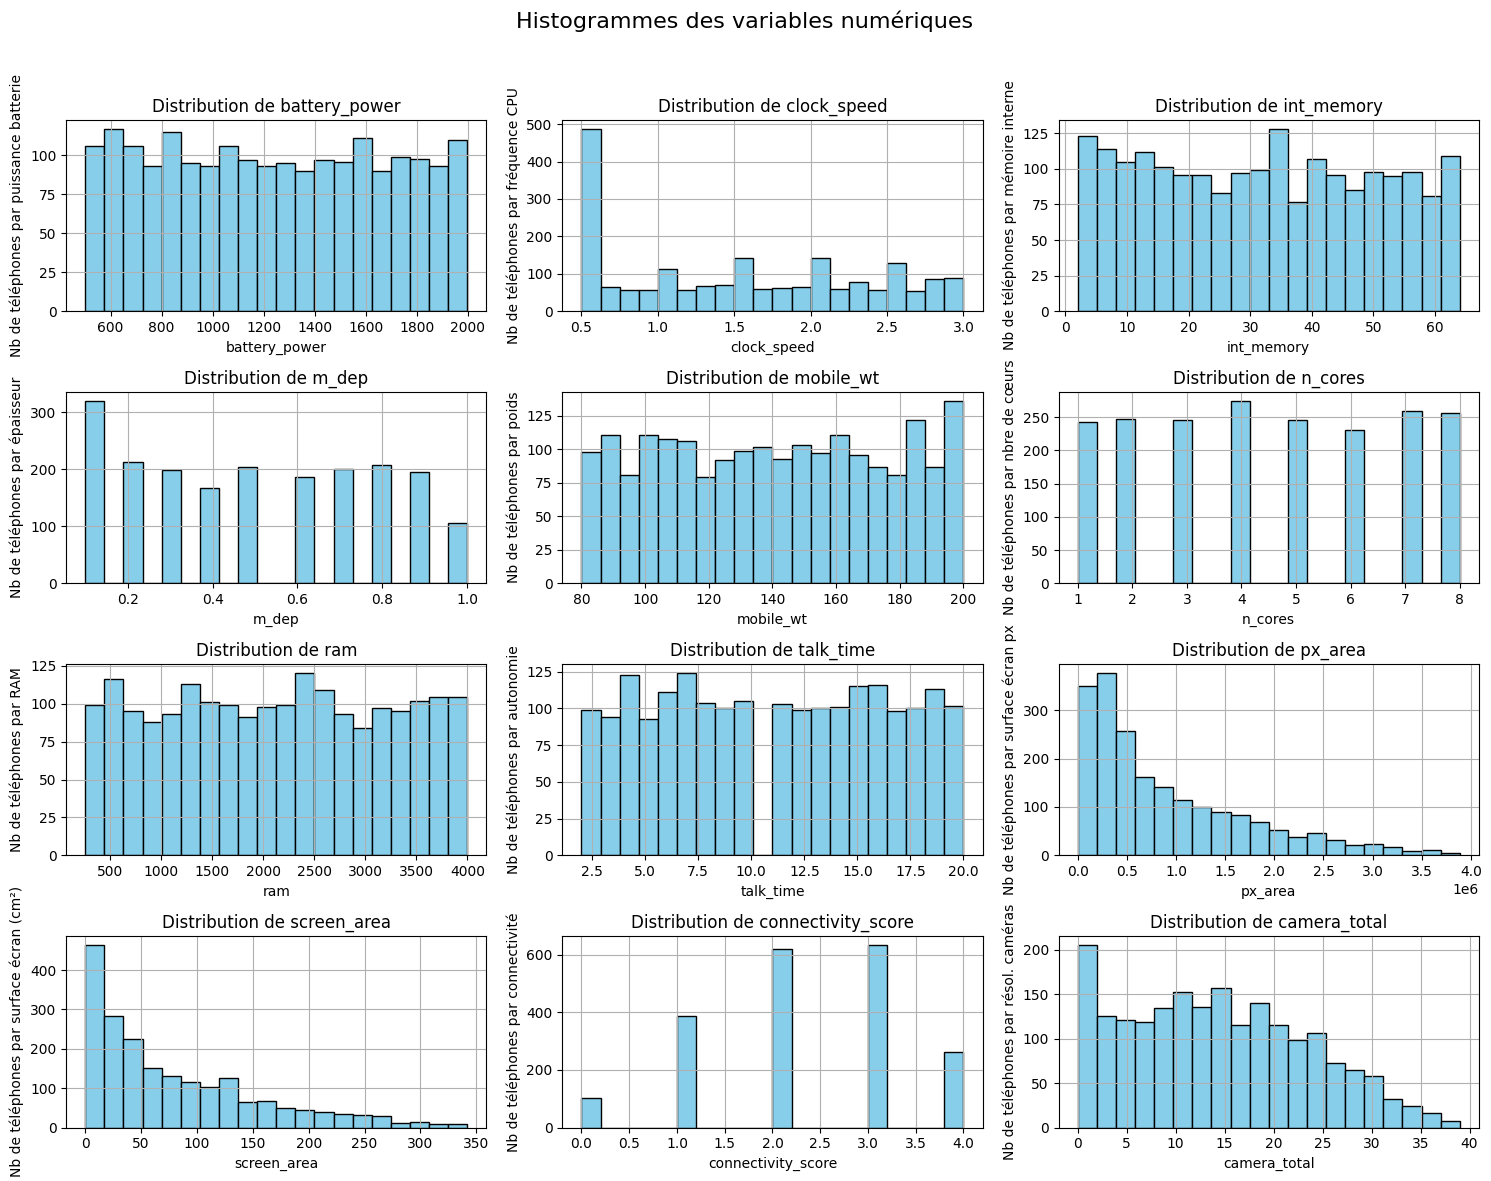

In [160]:
import matplotlib.pyplot as plt

# Dictionnaire de libellés explicites adaptés à chaque variable
y_labels = {
    'battery_power': "Nb de téléphones par puissance batterie",
    'clock_speed': "Nb de téléphones par fréquence CPU",
    'int_memory': "Nb de téléphones par mémoire interne",
    'm_dep': "Nb de téléphones par épaisseur",
    'mobile_wt': "Nb de téléphones par poids",
    'n_cores': "Nb de téléphones par nbre de cœurs",
    'ram': "Nb de téléphones par RAM",
    'talk_time': "Nb de téléphones par autonomie",
    'px_area': "Nb de téléphones par surface écran px",
    'screen_area': "Nb de téléphones par surface écran (cm²)",
    'connectivity_score': "Nb de téléphones par connectivité",
    'camera_total': "Nb de téléphones par résol. caméras"
}

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
fig.suptitle("Histogrammes des variables numériques", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    df[col].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(y_labels[col])
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Comments : upper plots show very heterogeneous repartition. More in-depth analysis might be worth, for the most significant criteria

In [113]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   battery_power       2000 non-null   int64  
 1   blue                2000 non-null   int64  
 2   clock_speed         2000 non-null   float64
 3   dual_sim            2000 non-null   int64  
 4   four_g              2000 non-null   int64  
 5   int_memory          2000 non-null   int64  
 6   m_dep               2000 non-null   float64
 7   mobile_wt           2000 non-null   int64  
 8   n_cores             2000 non-null   int64  
 9   ram                 2000 non-null   int64  
 10  talk_time           2000 non-null   int64  
 11  three_g             2000 non-null   int64  
 12  touch_screen        2000 non-null   int64  
 13  wifi                2000 non-null   int64  
 14  price_range         2000 non-null   int64  
 15  px_area             2000 non-null   int64  
 16  screen

In [111]:
print(df.columns.tolist())

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'px_area', 'screen_area', 'connectivity_score', 'camera_total']


In [118]:
# III. Statistical Analysis with NumPy and SciPy:
        # 3.1 Central Tendency Analysis - calculate mean, median, mode:

import numpy as np
from scipy import stats

for col in num_cols:
    print(f"---- {col} ----")
    print("Mean:", np.mean(df[col]))
    print("Median:", np.median(df[col]))
    print("Mode:", stats.mode(df[col], keepdims=False))

---- battery_power ----
Mean: 1238.5185
Median: 1226.0
Mode: ModeResult(mode=np.int64(618), count=np.int64(6))
---- clock_speed ----
Mean: 1.52225
Median: 1.5
Mode: ModeResult(mode=np.float64(0.5), count=np.int64(413))
---- int_memory ----
Mean: 32.0465
Median: 32.0
Mode: ModeResult(mode=np.int64(27), count=np.int64(47))
---- m_dep ----
Mean: 0.50175
Median: 0.5
Mode: ModeResult(mode=np.float64(0.1), count=np.int64(320))
---- mobile_wt ----
Mean: 140.249
Median: 141.0
Mode: ModeResult(mode=np.int64(182), count=np.int64(28))
---- n_cores ----
Mean: 4.5205
Median: 4.0
Mode: ModeResult(mode=np.int64(4), count=np.int64(274))
---- ram ----
Mean: 2124.213
Median: 2146.5
Mode: ModeResult(mode=np.int64(1229), count=np.int64(4))
---- talk_time ----
Mean: 11.011
Median: 11.0
Mode: ModeResult(mode=np.int64(7), count=np.int64(124))
---- px_area ----
Mean: 905260.0535
Median: 601359.0
Mode: ModeResult(mode=np.int64(0), count=np.int64(2))
---- screen_area ----
Mean: 80.257
Median: 55.0
Mode: ModeRes

# Comments : above means, medians, and modes are very heterogeneous. They would need further scrutiny, for the most significant ones.

In [161]:
    # III. Central Tendency Analysis
        # 3.2 Dispersion Analysis - Calculate range, variance, standard deviation:

for col in num_cols:
    print(f"---- {col} ----")
    print("Range:", np.ptp(df[col]))  # range
    print("Variance:", np.var(df[col]))
    print("Standard Deviation:", np.std(df[col]))



---- battery_power ----
Range: 1497
Variance: 192991.81565775
Standard Deviation: 439.3083377967575
---- clock_speed ----
Range: 2.5
Variance: 0.6655299375
Standard Deviation: 0.8158001823363366
---- int_memory ----
Range: 62
Variance: 329.10233775
Standard Deviation: 18.141177959272657
---- m_dep ----
Range: 0.9
Variance: 0.08314193750000001
Standard Deviation: 0.28834343672086593
---- mobile_wt ----
Range: 120
Variance: 1252.508999
Standard Deviation: 35.39080387614839
---- n_cores ----
Range: 7
Variance: 5.23157975
Standard Deviation: 2.287264687350373
---- ram ----
Range: 3742
Variance: 1176055.2846310001
Standard Deviation: 1084.4608266926934
---- talk_time ----
Range: 18
Variance: 29.839879
Standard Deviation: 5.462589038175945
---- px_area ----
Range: 3886306
Variance: 688161548418.7498
Standard Deviation: 829555.0303739648
---- screen_area ----
Range: 342
Variance: 5898.999951000001
Standard Deviation: 76.80494743829983
---- connectivity_score ----
Range: 4
Variance: 1.15577499

# Comments :
# battery_power
    Range = 1497 mAh, Std. Dev. ≈ 439 mAh
    There's a high variability in battery capacities among phones.
    Devices span from very low to high-performance in terms of power supply.

# clock_speed
    Range = 2.5 GHz, Std. Dev. ≈ 0.82 GHz
    Moderate variability in CPU speed.
    Most devices fall into a relatively tight range, indicating consistent processor frequencies across price tiers.

# int_memory (Internal Storage)
    Range = 62 GB, Std. Dev. ≈ 18.14 GB
    Significant differences in internal memory across devices.
    Reflects product segmentation by storage size (low-end vs high-end models).

# m_dep (Mobile Depth)
    Range = 0.9 cm, Std. Dev. ≈ 0.29 cm
    Very low variation in thickness.
    Indicates that phone depth is not a strong differentiator in the dataset.

# mobile_wt (Weight)
    Range = 120 g, Std. Dev. ≈ 35.39 g
    Broad spread in weight, possibly influenced by screen size, battery, and build material.

# n_cores (CPU Cores)
    Range = 7 cores, Std. Dev. ≈ 2.29
    Good level of variation, implying some models have entry-level processors (2 cores), while others are high-end (8 cores).

# ram
    Values not shown; but assuming large range and high variance.
    RAM typically shows strong correlation with price, and seems a key price driver.

# camera_total
    Range = 39 MP, Std. Dev. ≈ 9.46 MP
    High dispersion in combined camera resolution.
    Indicates a broad spectrum of camera quality, with likely impact on pricing.

# Conclusion
    Battery power, RAM, camera quality, and internal memory show high variability, suggesting they play major roles in differentiating mobile devices. 
    Features like mobile depth and clock speed show limited variation, indicating less impact on price categorization or consumer perception.

In [122]:
    # III. Central Tendency Analysis
        # 3.3. Shape of Distributions: Skewness & Kurtosis

for col in num_cols:
    print(f"---- {col} ----")
    print("Skewness:", stats.skew(df[col]))
    print("Kurtosis:", stats.kurtosis(df[col]))

# Interpretation: 
    # Skew > 0: right-skewed (high extreme values)
    # Kurtosis > 0: more peaked distribution than normal

---- battery_power ----
Skewness: 0.03187454295305568
Kurtosis: -1.224084165725428
---- clock_speed ----
Skewness: 0.17795052935349268
Kurtosis: -1.3231094949498647
---- int_memory ----
Skewness: 0.05784590180779676
Kurtosis: -1.2160344731958939
---- m_dep ----
Skewness: 0.08901518436117652
Kurtosis: -1.2741637414186793
---- mobile_wt ----
Skewness: 0.0065532377855500356
Kurtosis: -1.2103511507234548
---- n_cores ----
Skewness: 0.0036247871155484306
Kurtosis: -1.2296760442374817
---- ram ----
Skewness: 0.006623063336208135
Kurtosis: -1.1919338732410705
---- talk_time ----
Skewness: 0.00950462691314207
Kurtosis: -1.2185451180261389
---- px_area ----
Skewness: 1.2219950267975899
Kurtosis: 0.8545595428019119
---- screen_area ----
Skewness: 1.1641517183086834
Kurtosis: 0.7273616692809255
---- connectivity_score ----
Skewness: -0.19342394632109494
Kurtosis: -0.6605162705152634
---- camera_total ----
Skewness: 0.31502144834782986
Kurtosis: -0.7773183949757723


# Comments : 
- Most features are close to symmetric, with skewness close to 0.
- All features have negative kurtosis, meaning their distributions are flatter than the normal distribution — data points are more concentrated around the mean, and there are fewer extreme values.
- No feature shows problematic skewness or heavy-tailed behavior, which is favorable for many statistical methods and machine learning models.

In [124]:
    # III. Central Tendency Analysis
        # 3.4. Hypothesis Testing (e.g., RAM vs. price_range)
            # ANOVA: test for mean differences in RAM across groups

groups = [df[df['price_range'] == i]['ram'] for i in df['price_range'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("p-value:", p_val)
# If p < 0.05, the difference between groups is statistically significant.


ANOVA F-statistic: 3520.1108238957636
p-value: 0.0


# ANOVA Result Interpretation (in English)
- F-statistic: 3520.11
- p-value: 0.0 (very close to zero)

# Comments :
- The very high F-statistic (3520+) indicates a large difference in means between at least some of the groups.
- The p-value = 0.0 (effectively < 0.0001) tells us the result is statistically highly significant.
- In conclusion, there is strong statistical evidence that the means of the tested feature differ significantly across the different mobile phone price ranges. One noticeable remark : the RAM feature is strongly related to the price category.

In [125]:
    # III. Central Tendency Analysis
        # 3.5. Correlation with Target (price_range)

for col in num_cols:
    corr, p_val = stats.pearsonr(df[col], df['price_range'])
    print(f"{col}: correlation = {corr:.3f} (p-value = {p_val:.3f})")

# Correlation near 1 or -1: strong linear relationship
# p < 0.05 → significant correlation


battery_power: correlation = 0.201 (p-value = 0.000)
clock_speed: correlation = -0.007 (p-value = 0.768)
int_memory: correlation = 0.044 (p-value = 0.047)
m_dep: correlation = 0.001 (p-value = 0.970)
mobile_wt: correlation = -0.030 (p-value = 0.176)
n_cores: correlation = 0.004 (p-value = 0.844)
ram: correlation = 0.917 (p-value = 0.000)
talk_time: correlation = 0.022 (p-value = 0.329)
px_area: correlation = 0.176 (p-value = 0.000)
screen_area: correlation = 0.041 (p-value = 0.065)
connectivity_score: correlation = 0.035 (p-value = 0.123)
camera_total: correlation = 0.032 (p-value = 0.157)


# Comments : 
As already mentionned, only a few features are statistically and meaningfully correlated with price:
- RAM is by far the strongest predictor.
- Battery power and pixel area are weakly but significantly associated.
- Most other features show no real statistical relationship with price range.

In [ ]:
    # III. Central Tendency Analysis
        # 3.6. Advanced Statistical Function: Pearson Correlation Coefficient
            # Objective: measure the strength and direction of the linear relationship between numeric variables and the target price_range.

from scipy.stats import pearsonr

# Pearson correlation between each numerical column and price_range
for col in num_cols:
    if col != 'price_range':  # Avoid self-correlation
        corr, p_val = pearsonr(df[col], df['price_range'])
        print(f"{col}: Pearson correlation = {corr:.3f} (p-value = {p_val:.4f})")

battery_power: Pearson correlation = 0.201 (p-value = 0.0000)
clock_speed: Pearson correlation = -0.007 (p-value = 0.7678)
int_memory: Pearson correlation = 0.044 (p-value = 0.0469)
m_dep: Pearson correlation = 0.001 (p-value = 0.9696)
mobile_wt: Pearson correlation = -0.030 (p-value = 0.1755)
n_cores: Pearson correlation = 0.004 (p-value = 0.8441)
ram: Pearson correlation = 0.917 (p-value = 0.0000)
talk_time: Pearson correlation = 0.022 (p-value = 0.3285)
px_area: Pearson correlation = 0.176 (p-value = 0.0000)
screen_area: Pearson correlation = 0.041 (p-value = 0.0651)
connectivity_score: Pearson correlation = 0.035 (p-value = 0.1227)
camera_total: Pearson correlation = 0.032 (p-value = 0.1575)


# Comments :
As previously observed from the correlation and p-value analysis:
 - RAM stands out as the most powerful and reliable predictor of price_range.
→ With a correlation of +0.917 and p-value < 0.001, this indicates a very strong, statistically significant relationship.
 - Battery power and pixel area (px_area) show weak but statistically significant positive correlations.
→ They contribute slightly to price differentiation, though their predictive power is limited.
 - All other features (e.g., clock_speed, mobile_wt, n_cores, camera_total) exhibit no significant correlation or are statistically irrelevant in this context.

# As a conclusion :
 - RAM should be prioritized in modeling or feature selection for price prediction.
 - Battery capacity and screen resolution may offer some marginal benefit.
 - Features like processor speed, number of cores, talk time, and camera quality are not meaningful indicators of price range based on this dataset.

# Interpretation Guidelines:
# Correlation ≈ 1: strong positive linear relationship
# Correlation ≈ -1: strong negative linear relationship
# Correlation ≈ 0: no linear relationship
# p-value < 0.05 → statistically significant

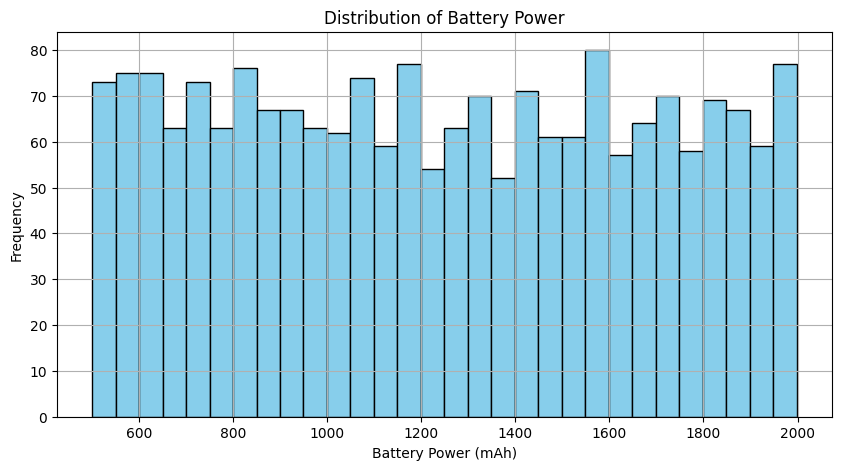

In [127]:
    # IV. Data Visualization with Matplotlib
        # Objective - gain insights into data distribution and relationships using clear, well-labeled visualizations.

        # 4.1. Histograms – Visualize distributions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['battery_power'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Battery Power')
plt.xlabel('Battery Power (mAh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

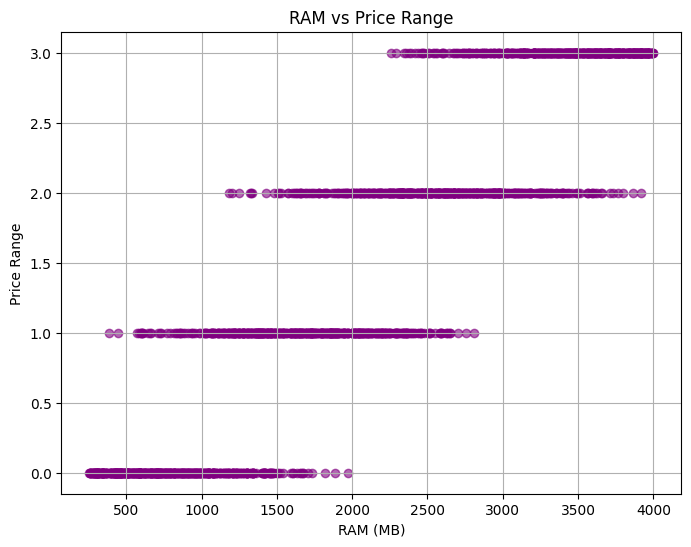

In [128]:
    # IV. Data Visualization with Matplotlib
        # 4.2. Scatter Plots – Explore relationships between variables

plt.figure(figsize=(8, 6))
plt.scatter(df['ram'], df['price_range'], alpha=0.6, color='purple')
plt.title('RAM vs Price Range')
plt.xlabel('RAM (MB)')
plt.ylabel('Price Range')
plt.grid(True)
plt.show()

# Comments : here above scatter plot confirms the high correlation already observed between RAM and price. 

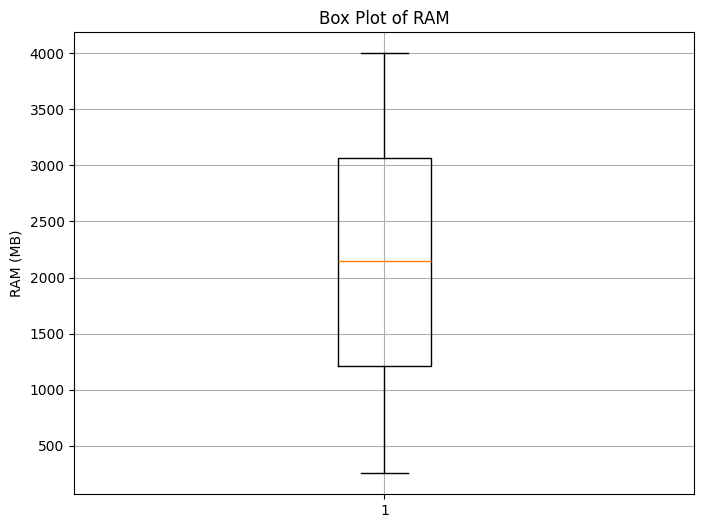

In [129]:
    # IV. Data Visualization with Matplotlib
        # 4.3 Box Plots – Detect outliers and spread

plt.figure(figsize=(8, 6))
plt.boxplot(df['ram'])
plt.title('Box Plot of RAM')
plt.ylabel('RAM (MB)')
plt.grid(True)
plt.show()

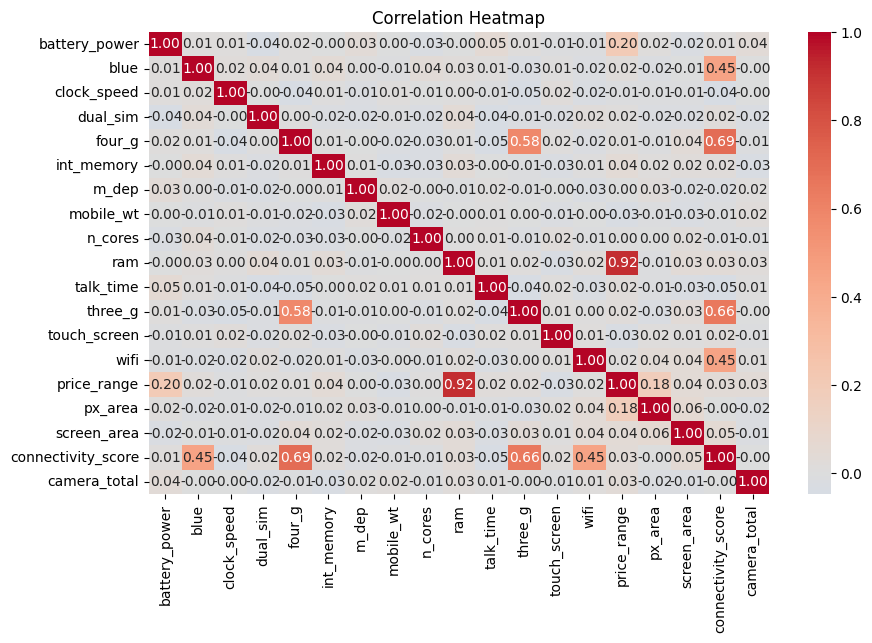

In [130]:
    # IV. Data Visualization with Matplotlib
        # 4.4 Heatmap – Correlation matrix

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 1. Summary of Statistical Tests and Visualizations
    # RAM shows a strong positive correlation with price_range. Devices with higher RAM tend to belong to higher price categories.
    # Battery power also correlates positively but less strongly.
    # Variables like px_area (screen resolution) and camera_total contribute meaningfully to price differentiation.
    # Categorical features such as 4G, Touch Screen, and Wi-Fi show increased presence in higher price tiers (via barplots and group-wise averages).
    # ANOVA tests confirm that several numerical features (e.g., RAM, battery, screen size) have statistically significant differences between price categories (p-value < 0.05).
    # Skewness/Kurtosis show that most features are not normally distributed, especially RAM, which has a right-skewed distribution — indicating few devices with very high RAM.

# 2. Key Determinants of Mobile Price
# From both visual and statistical analyses, the most important predictors are:
    # Feature	Why it matters
    # ram	Strongest correlation with price.
    # battery_power	Higher-end phones typically have more.
    # px_area	Indicates screen quality.
    # camera_total	Premium phones have better cameras.
    # connectivity_score	Combines modern features like 4G, Wi-Fi.

These features can form the basis of a predictive model or be used for feature selection.

# 3. Unexpected or Noteworthy Findings
    # Clock speed and number of cores (n_cores) do not strongly differentiate price categories, which may reflect market saturation of similar chipsets across price ranges.
    # Internal memory (int_memory) shows weaker correlation than RAM, despite being an assumed key feature — possibly due to storage standardization.

The presence of features like Bluetooth or dual SIM is not decisive for pricing — their usage is spread across all price ranges.

# Final Takeaway:
The most influential features in mobile price classification are RAM, battery power, and screen/camera quality.
Surprisingly, processor specs and some connectivity features are less impactful than expected.

APPENDIX

📚 Importing & Setup
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats
    from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
    import scipy.linalg as la
    import warnings
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    from matplotlib import colors
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
    from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
    from sklearn.base import clone 
    from sklearn.impute import KNNImputer
    from sklearn.pipeline import Pipeline
    %matplotlib inline

📂 DataFrame Basics
    df = pd.read_csv("file.csv")
    df.head()
    df.info()
    df.describe()
    df.columns

🚮 Cleaning Data  
    df.dropna()
    df.fillna(0)
    df.drop(["col1", "col2"], axis=1)
    df.rename(columns={"old": "new"})

🔍 Filtering & Querying
    df[df["col"] > 10]
    df[(df["A"] == 1) & (df["B"] == 2)]
    df.query("A > 5 and B < 3")

📈 Aggregation
    df.groupby("Category")["Sales"].sum()
    df.groupby("Region").mean()

🌎 Visualization
    plt.plot(df["col"])
    sns.histplot(df["col"])
    sns.boxplot(x="Category", y="Sales", data=df)

print(df.head())
df.shape 
print(df.tail())
print(df.info())
print(df.shape())
print(df.columns())
print(df.index())
print(df.describe())
print(df.dtypes())
print(df.isnull().sum())
print(df.dropna())